In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Cargar el archivo Excel en un DataFrame de Pandas
df = pd.read_excel("AirQualityUCI.xlsx")

In [9]:
# Utilizar el método info() para obtener información sobre el DataFrame
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       

In [4]:
#Para observar si hay datos nulos en el dataset
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [10]:
# Utilizar el método describe() para obtener estadísticas descriptivas del DataFrame
print("\nDescripción del DataFrame:")
print(df.describe())


Descripción del DataFrame:
                                Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480   -34.207524  1048.869652  -159.090093   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00     0.600000   921.000000  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1052.500000  -200.000000   
75%              2004-12-28 00:00:00     2.600000  1221.250000  -200.000000   
max              2005-04-04 00:00:00    11.900000  2039.750000  1189.000000   
std                              NaN    77.657170   329.817015   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
min    -200.000000    -200.00

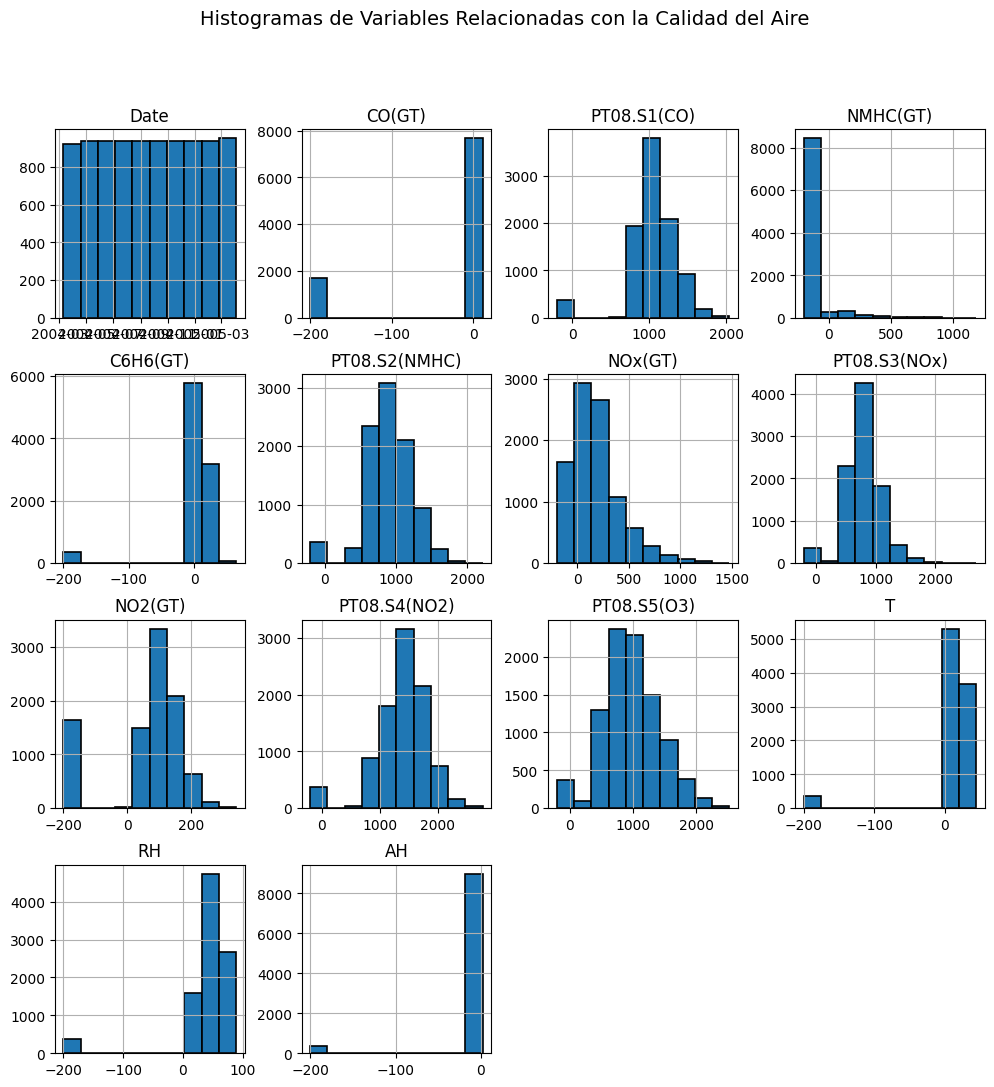

In [6]:

df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.suptitle('Histogramas de Variables Relacionadas con la Calidad del Aire', fontsize=14)
plt.show()

In [11]:
def convert_date_to_numeric(df):
    # Convertir 'Date' a tipo datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    # Asignar un valor numérico secuencial a cada fecha
    df['Numeric_Date'] = (df['Date'] - df['Date'].min()).dt.days + 1
    return df

df = convert_date_to_numeric(df)

In [12]:
def extract_hour(df):
    # Convertir 'Time' a tipo datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    # Extraer la hora de 'Time'
    df['Hour'] = df['Time'].dt.hour
    return df

df = extract_hour(df)

In [13]:
# Mostrar las primeras filas del DataFrame
print(df.head())

        Date                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10 1900-01-01 18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10 1900-01-01 19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10 1900-01-01 20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10 1900-01-01 21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10 1900-01-01 22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  Numeric_Date  Hour  
0  1

In [14]:
# Reemplazar -200 (valores faltantes) por NaN
df.replace(-200, np.nan, inplace=True)

In [15]:
 #Asegurarse de que todas las columnas sean numéricas
df = df.apply(pd.to_numeric)

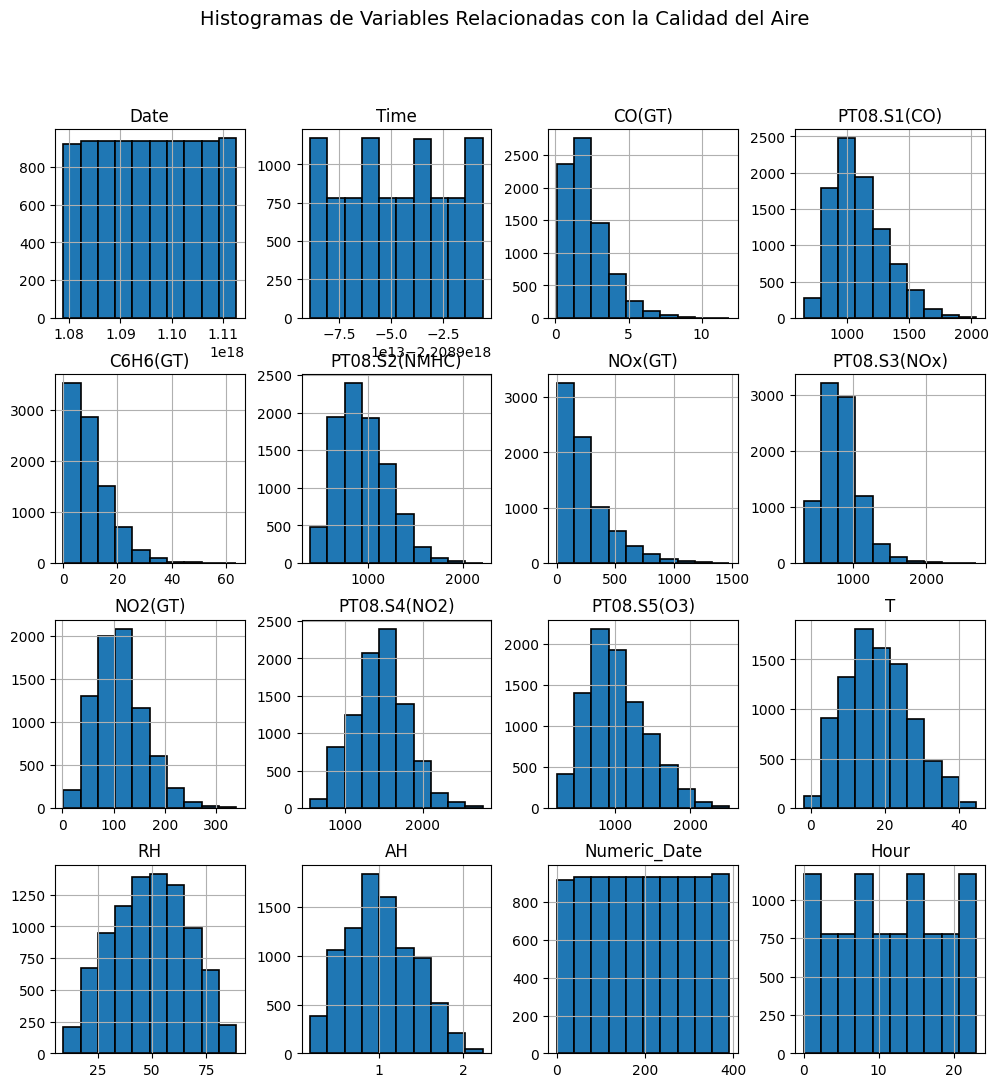

In [16]:
# Incorporar el código para visualizar histogramas de las variables relacionadas con la calidad del aire excluyendo 'aire'
air_quality_data = df.drop(['NMHC(GT)'], axis=1)
air_quality_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.suptitle('Histogramas de Variables Relacionadas con la Calidad del Aire', fontsize=14)
plt.show()

In [17]:
# Utilizar KNNImputer para imputar valores faltantes
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


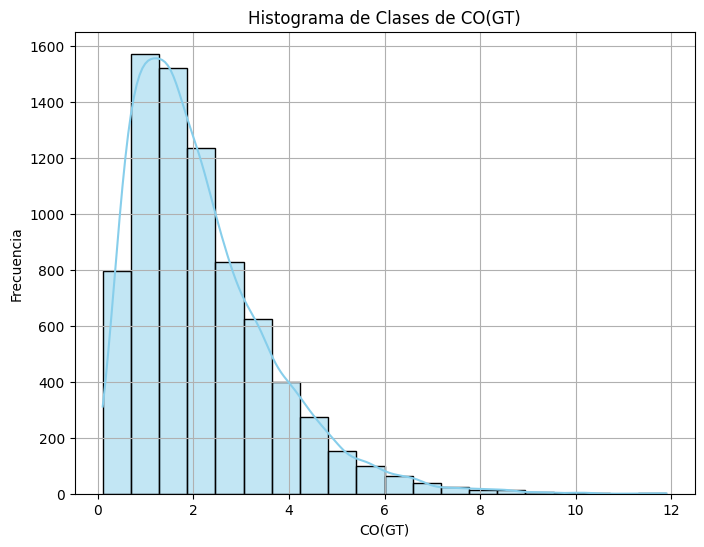

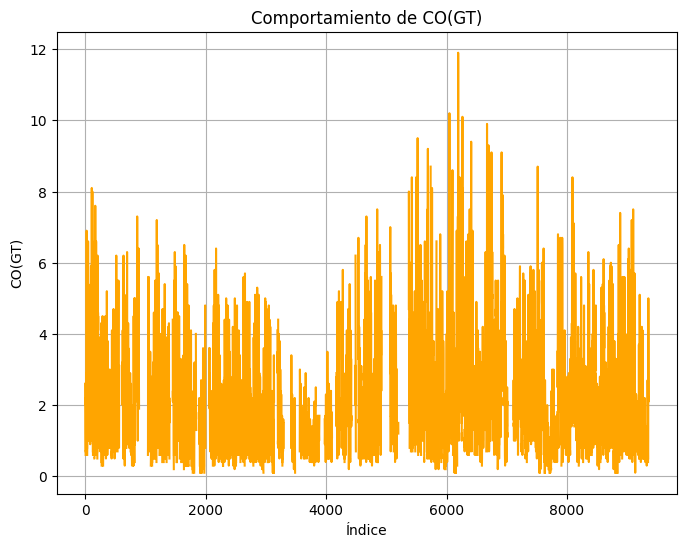

In [18]:

# Histograma de clases
plt.figure(figsize=(8, 6))
sns.histplot(df['CO(GT)'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Clases de CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Gráfica de línea para observar el comportamiento de la variable CO(GT)
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['CO(GT)'], color='orange')
plt.title('Comportamiento de CO(GT)')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()


In [25]:
 #Calcular la matriz de correlación
corr_matrix = df_imputed.corr()


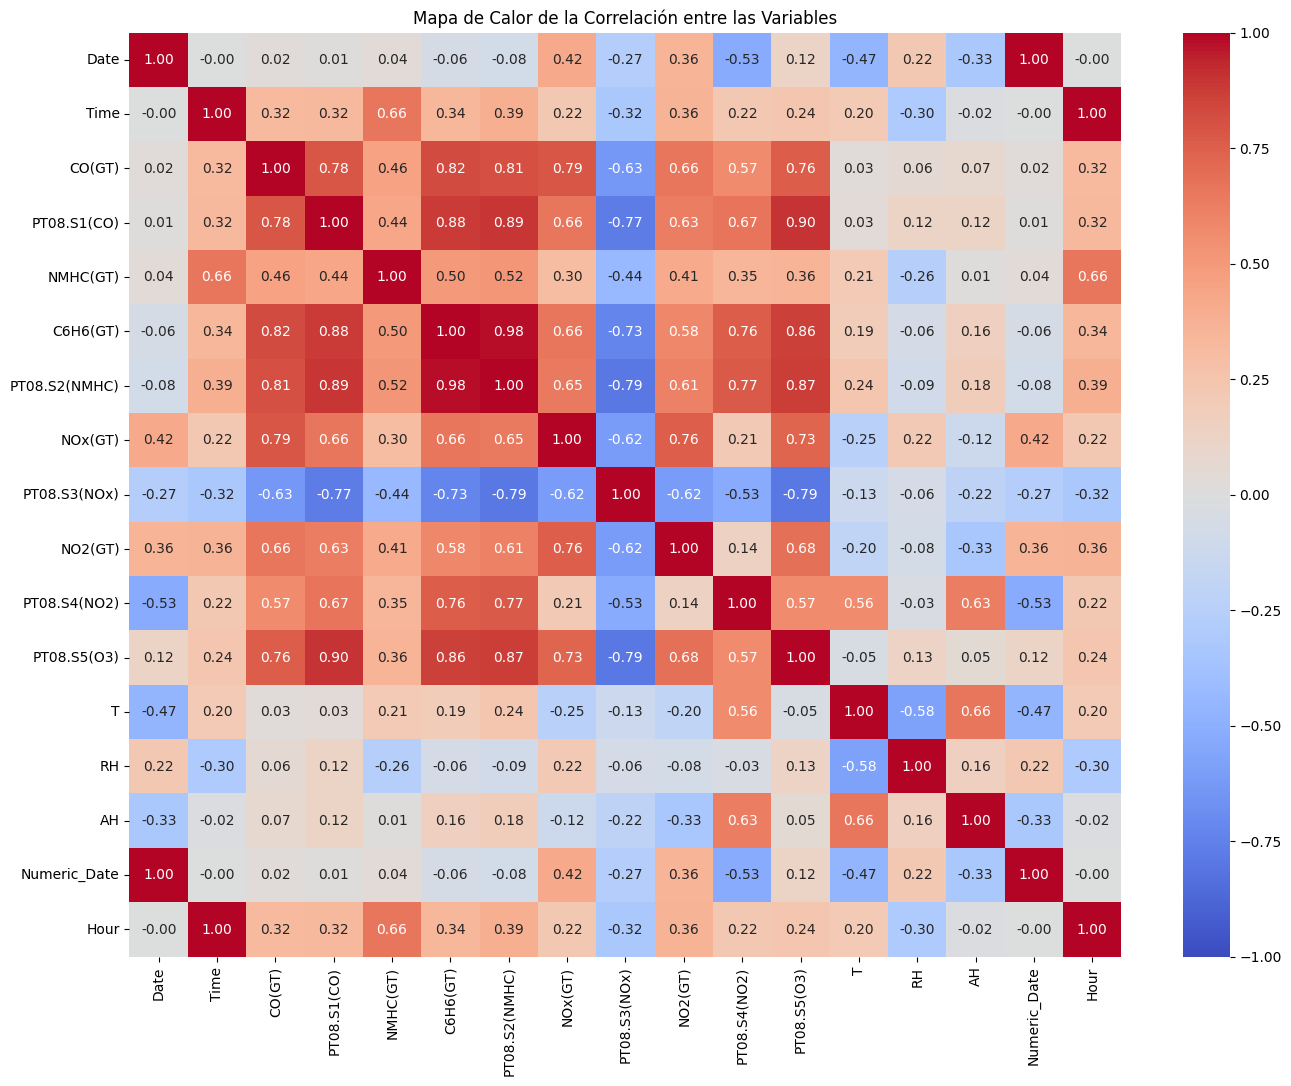

In [26]:
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre las Variables')
plt.show()

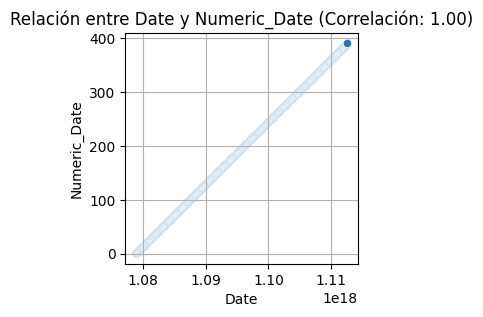

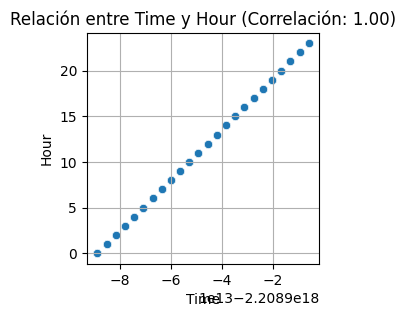

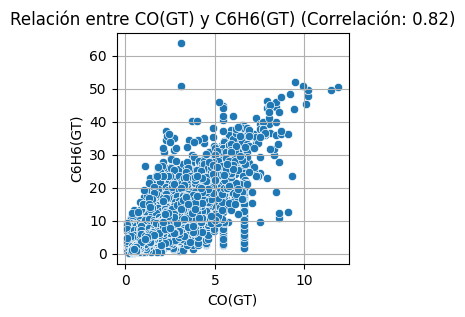

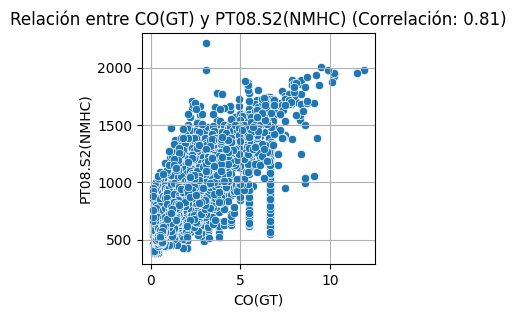

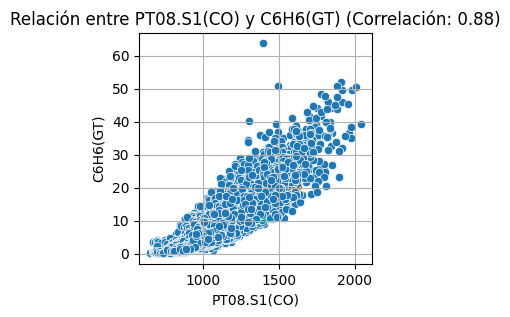

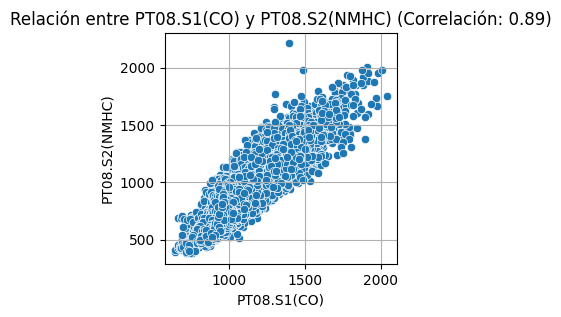

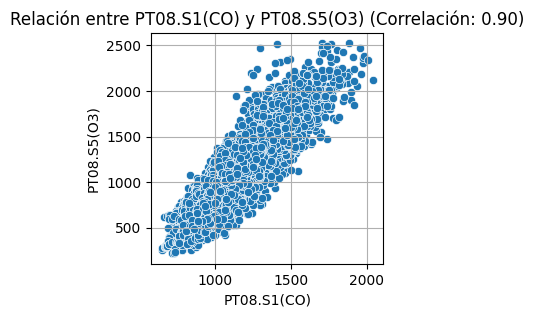

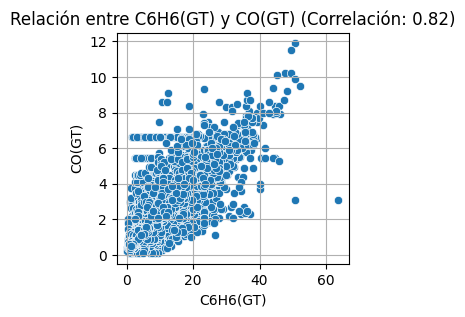

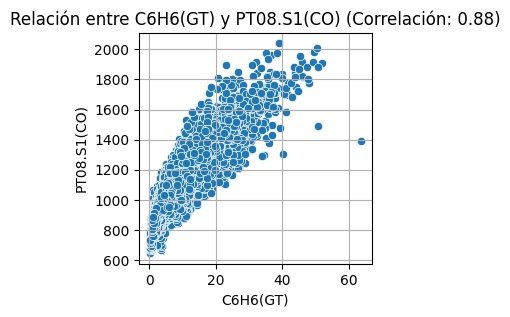

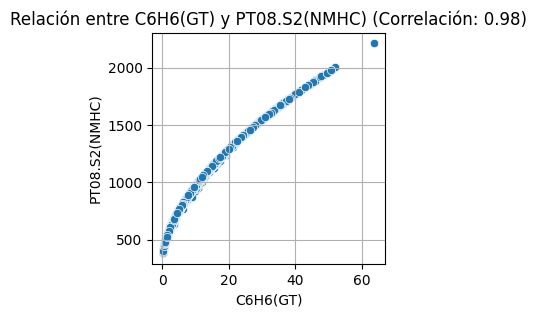

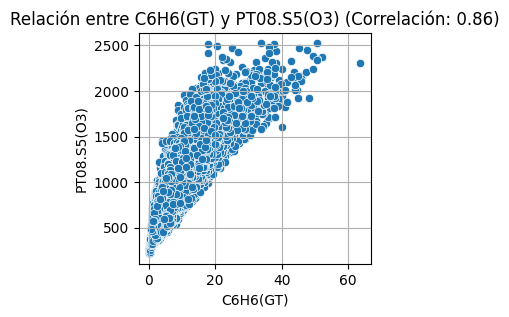

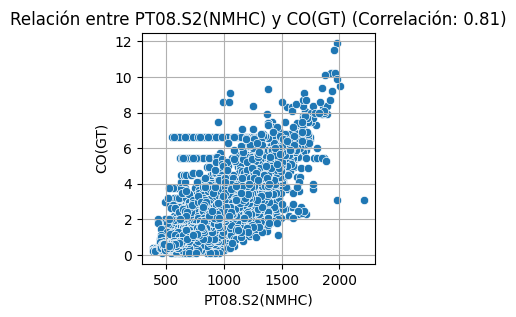

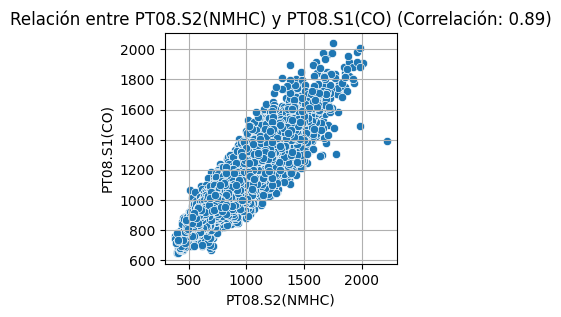

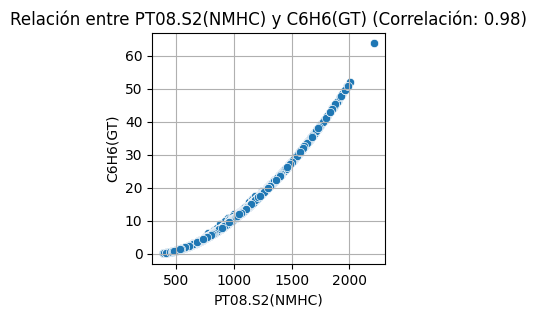

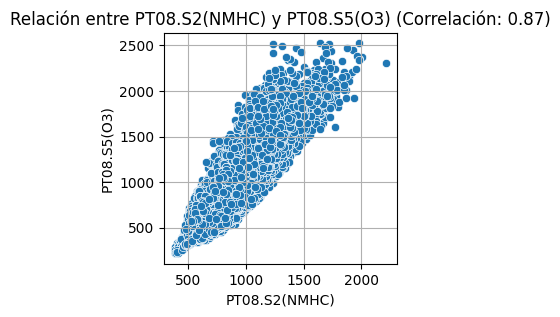

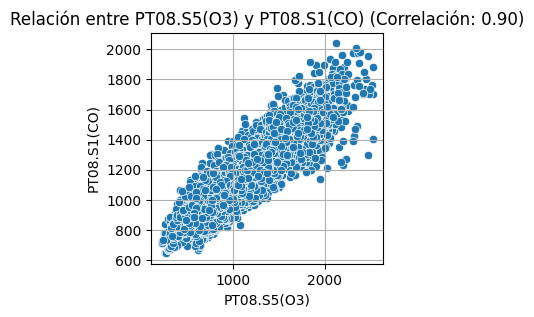

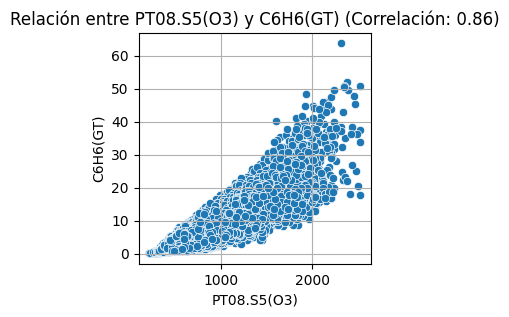

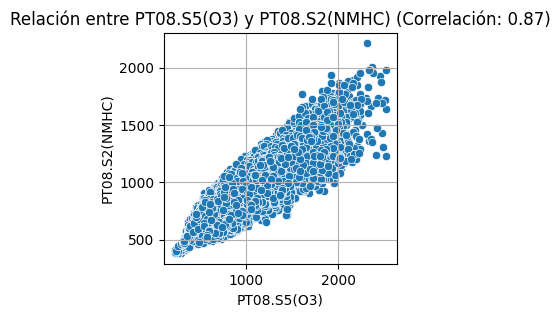

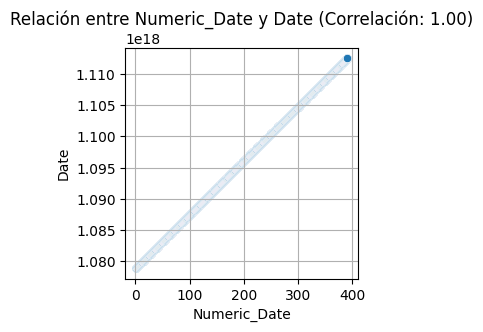

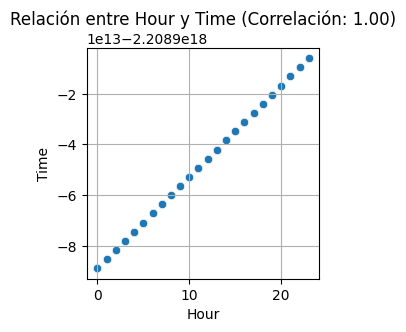

In [27]:
# Seleccionar pares de variables con alta correlación (|correlación| > 0.7)
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix.loc[i, j]) > 0.8]

# Visualizar la relación lineal entre los pares de variables con alta correlación
for (var1, var2) in high_corr_pairs:
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x=df_imputed[var1], y=df_imputed[var2])
    plt.title(f'Relación entre {var1} y {var2} (Correlación: {corr_matrix.loc[var1, var2]:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

In [28]:
# Calcular la matriz de correlación
corr_matrix = df_imputed.corr().abs()

# Crear una matriz booleana donde True indica alta correlación
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [29]:
# Identificar las columnas con alta correlación
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)]

# Eliminar las columnas con alta correlación
df_reduced = df_imputed.drop(columns=to_drop)

# Mostrar las columnas eliminadas
print("Columnas eliminadas debido a alta correlación:")
print(to_drop)

Columnas eliminadas debido a alta correlación:
['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Numeric_Date', 'Hour']


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


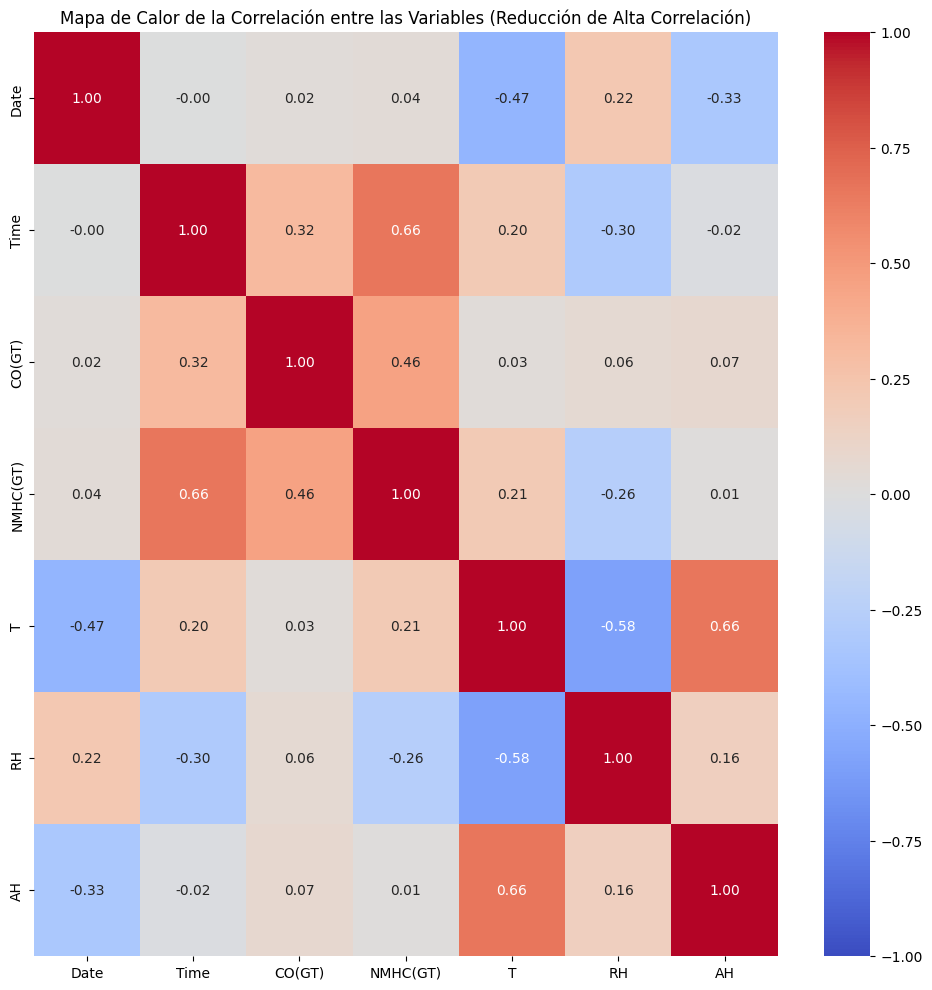

Información del DataFrame reducido:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9357 non-null   float64
 1   Time      9357 non-null   float64
 2   CO(GT)    9357 non-null   float64
 3   NMHC(GT)  9357 non-null   float64
 4   T         9357 non-null   float64
 5   RH        9357 non-null   float64
 6   AH        9357 non-null   float64
dtypes: float64(7)
memory usage: 511.8 KB
None


In [50]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_reduced.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre las Variables (Reducción de Alta Correlación)')
plt.show()

# Utilizar el método info() para obtener información sobre el DataFrame reducido
print("Información del DataFrame reducido:")
print(df_reduced.info())

DataFrame reducido después de la eliminación de variables altamente correlacionadas:
           Date          Time  CO(GT)  NMHC(GT)      T         RH        AH
0  1.078877e+18 -2.208924e+18     2.6     150.0  13.60  48.875001  0.757754
1  1.078877e+18 -2.208920e+18     2.0     112.0  13.30  47.700000  0.725487
2  1.078877e+18 -2.208917e+18     2.2      88.0  11.90  53.975000  0.750239
3  1.078877e+18 -2.208913e+18     2.2      80.0  11.00  60.000000  0.786713
4  1.078877e+18 -2.208910e+18     1.6      51.0  11.15  59.575001  0.788794

Datos normalizados usando MinMaxScaler:
   Date      Time    CO(GT)  NMHC(GT)         T        RH        AH
0   0.0  0.782609  0.211864  0.120981  0.333333  0.499057  0.280046
1   0.0  0.826087  0.161017  0.088832  0.326882  0.484287  0.264279
2   0.0  0.869565  0.177966  0.068528  0.296774  0.563168  0.276374
3   0.0  0.913043  0.177966  0.061760  0.277419  0.638906  0.294198
4   0.0  0.956522  0.127119  0.037225  0.280645  0.633564  0.295215

Datos nor

<Figure size 1200x1200 with 0 Axes>

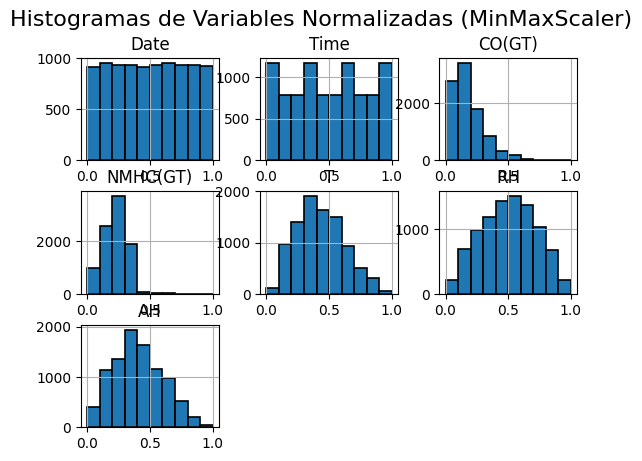

<Figure size 1200x1200 with 0 Axes>

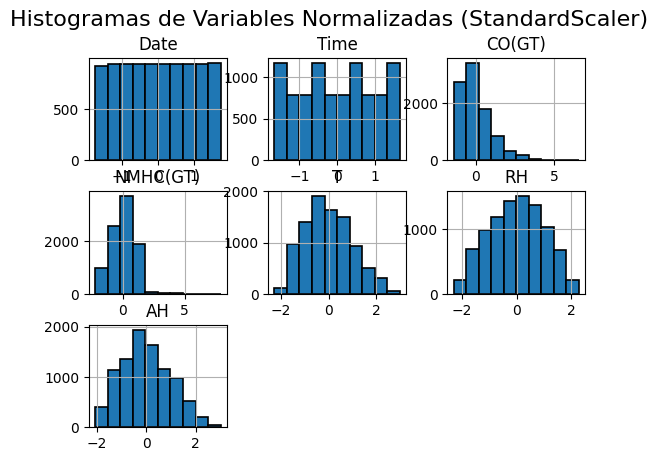

In [31]:

# Normalización de los datos
# Usando MinMaxScaler para escalar los datos entre 0 y 1
min_max_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_reduced), columns=df_reduced.columns)

# Usando StandardScaler para normalizar los datos a media 0 y desviación estándar 1
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_reduced), columns=df_reduced.columns)

# Visualizar el DataFrame reducido
print("DataFrame reducido después de la eliminación de variables altamente correlacionadas:")
print(df_reduced.head())

# Visualizar los datos normalizados usando MinMaxScaler
print("\nDatos normalizados usando MinMaxScaler:")
print(df_minmax_scaled.head())

# Visualizar los datos normalizados usando StandardScaler
print("\nDatos normalizados usando StandardScaler:")
print(df_standard_scaled.head())

# Histogramas de las variables normalizadas usando MinMaxScaler
plt.figure(figsize=(12, 12))
df_minmax_scaled.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Histogramas de Variables Normalizadas (MinMaxScaler)', fontsize=16)
plt.show()

# Histogramas de las variables normalizadas usando StandardScaler
plt.figure(figsize=(12, 12))
df_standard_scaled.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Histogramas de Variables Normalizadas (StandardScaler)', fontsize=16)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
# Particionar los datos en conjuntos de entrenamiento y prueba
# Suponiendo que 'CO(GT)' es la variable objetivo
X = df_minmax_scaled.drop(columns=['CO(GT)'])
y = df_minmax_scaled['CO(GT)']

# Dividir los datos normalizados usando MinMaxScaler
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir los datos normalizados usando StandardScaler
X_standard = df_standard_scaled.drop(columns=['CO(GT)'])
y_standard = df_standard_scaled['CO(GT)']
# Dividir los datos normalizados usando MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento y prueba:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Datos de entrenamiento y prueba:
X_train shape: (7485, 6)
X_test shape: (1872, 6)
y_train shape: (7485,)
y_test shape: (1872,)


In [48]:

# Definir los modelos y sus hiperparámetros
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
svr = SVR()

# Definir los hiperparámetros para GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
#Random Forest Regressor
param_grid_rf = {
    'n_estimators': [10, 30, 70],
    'max_features': ['sqrt', 'log2'],  # Eliminamos 'auto'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'C': [0.1, 1, 10, 80],
    'gamma': [1e-3, 1e-4, 'scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Configurar GridSearchCV para cada modelo
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [43]:
# Entrenar los modelos y buscar los mejores parámetros
grid_search_knn.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [47]:
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 70]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
grid_search_svr.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 80],
                         'gamma': [0.001, 0.0001, 'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
# Obtener los mejores parámetros y los mejores modelos
best_knn = grid_search_knn.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_svr = grid_search_svr.best_estimator_

print("Mejores parámetros para KNN:", grid_search_knn.best_params_)
print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejores parámetros para SVR:", grid_search_svr.best_params_)



Mejores parámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mejores parámetros para Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Mejores parámetros para SVR: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [38]:

# Evaluar los modelos en el conjunto de prueba
y_pred_knn = best_knn.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_svr = best_svr.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svr = mean_squared_error(y_test, y_pred_svr)

r2_knn = r2_score(y_test, y_pred_knn)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)

print("MSE para KNN en el conjunto de prueba:", mse_knn)
print("R2 para KNN en el conjunto de prueba:", r2_knn)

print("MSE para Random Forest en el conjunto de prueba:", mse_rf)
print("R2 para Random Forest en el conjunto de prueba:", r2_rf)

print("MSE para SVR en el conjunto de prueba:", mse_svr)
print("R2 para SVR en el conjunto de prueba:", r2_svr)

MSE para KNN en el conjunto de prueba: 0.007794385966438858
R2 para KNN en el conjunto de prueba: 0.5133549611693258
MSE para Random Forest en el conjunto de prueba: 0.00555021921363472
R2 para Random Forest en el conjunto de prueba: 0.653470246871536
MSE para SVR en el conjunto de prueba: 0.008885149647620728
R2 para SVR en el conjunto de prueba: 0.4452527737398827
